In [142]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [143]:
data=pd.read_csv('data.csv')
data.drop(['id'],axis=1)
y=data.iloc[:,1]
x=data.iloc[:,2:-1]

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [147]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU

In [148]:
clf = Sequential()

In [149]:
clf.add(Dense(units=9,kernel_initializer='he_uniform',activation='leaky_relu',input_dim=30))
clf.add(Dense(units=9,kernel_initializer='he_uniform',activation='leaky_relu'))
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [150]:
clf.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 9)                 279       
                                                                 
 dense_41 (Dense)            (None, 9)                 90        
                                                                 
 dense_42 (Dense)            (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [151]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
model = clf.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.0325 - accuracy: 0.4095
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9335 - accuracy: 0.4397
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8456 - accuracy: 0.4824
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7640 - accuracy: 0.5553
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.6055
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6235 - accuracy: 0.6482
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.6784
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5178 - accuracy: 0.7161
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.7638
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.4374 - accuracy: 0.7990
Epoch 11/200
4/4 [===========

In [153]:
y_pred = (y_pred>0.5)

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[106   2]
 [  3  60]]
score is: 0.9707602339181286


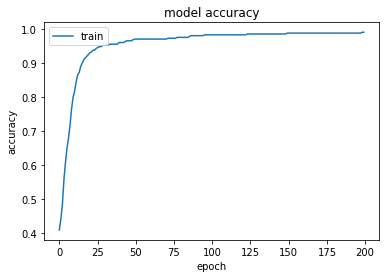

In [155]:
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

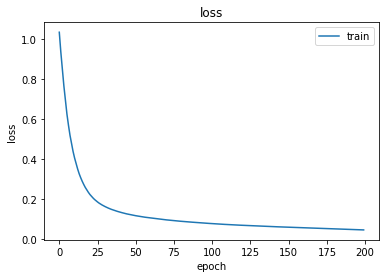

In [156]:
plt.plot(model.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()